# Finding Lane Lines for Self Driving Cars

This talk will walk through identifying lane lines based on images and video taken from onboard cameras.

### Packages

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact, interactive, fixed

%matplotlib inline

## Camera Calibration

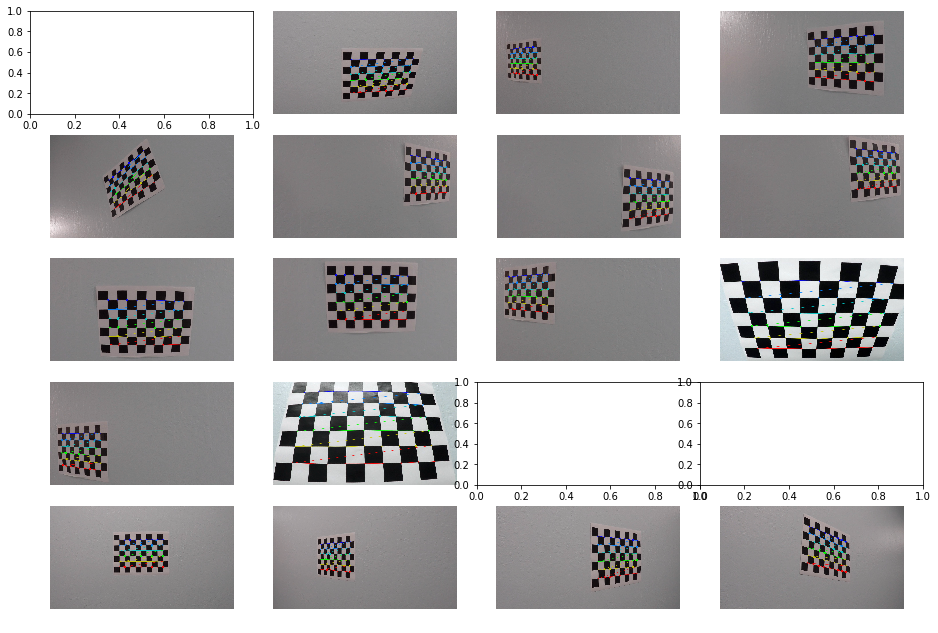

In [2]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

fig, axs = plt.subplots(5,4, figsize=(16, 11))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

# Step through the list of images and search for chessboard corners in each one
for i, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points to the lists
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        
        axs[i].axis('off')
        axs[i].imshow(img)

*** Note that some of the images do not show because the chessboard corners were not found (ret == False).

### Use the object and image point lists from the chessboards above to calibrate the camera

In [3]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

What do these things look like, anyway?

In [4]:
print("Camera Matrix")
print(mtx)
print("Distortion Coeffs")
print(dist)

Camera Matrix
[[  1.15396093e+03   0.00000000e+00   6.69705357e+02]
 [  0.00000000e+00   1.14802496e+03   3.85656234e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
Distortion Coeffs
[[ -2.41017956e-01  -5.30721173e-02  -1.15810355e-03  -1.28318856e-04
    2.67125290e-02]]


## Image Distortion

We can use the `cv2.undistort` function to undistort our images based on our camera calibration from above

Here's a helper function to do just that:

In [5]:
def undistort(img, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

Let's test it out on one of the chessboard images and see what it looks like after it's undistorted

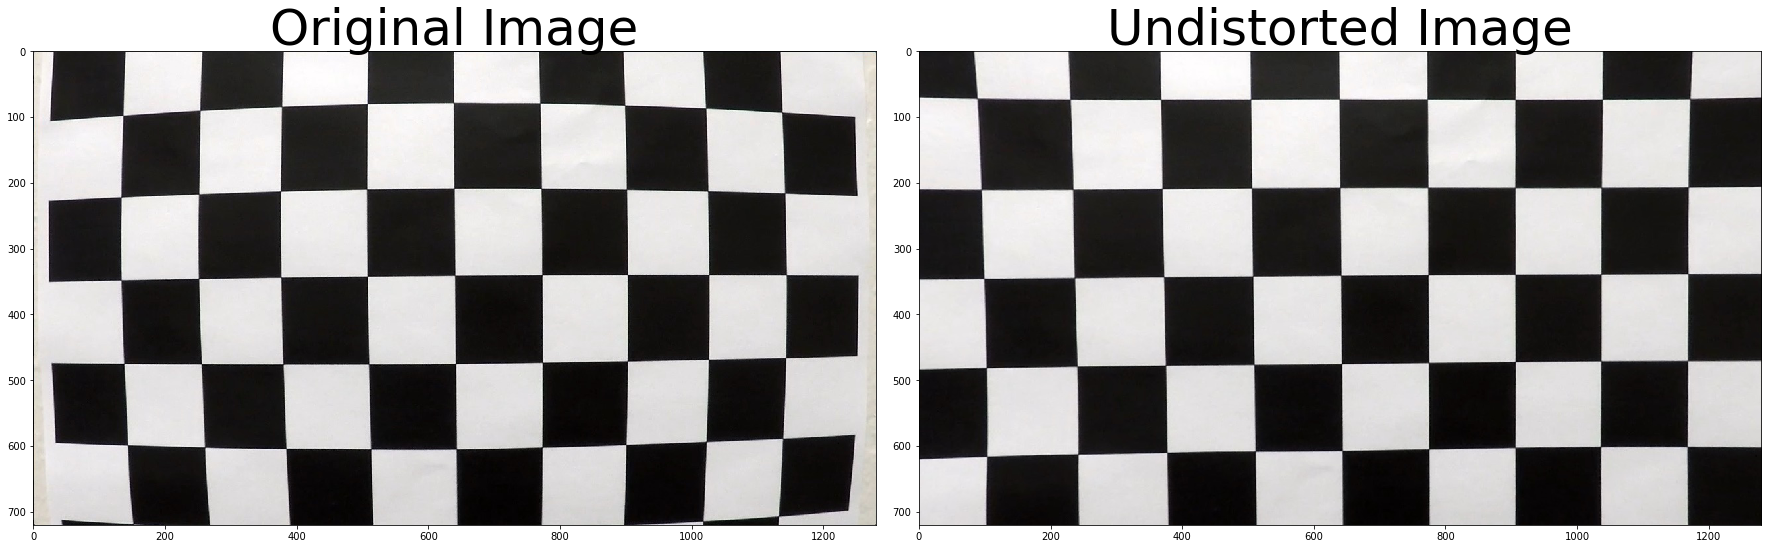

In [6]:
fname = './camera_cal/calibration1.jpg'

img = mpimg.imread(fname)

# Use the undistort function, with the mtx and dist calculated above
undist = undistort(img, mtx, dist)

### print an example plot of a comparison of a distorted and undistorted image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Well you can definitely see a difference!

Let's try it on an image taken from a car video.

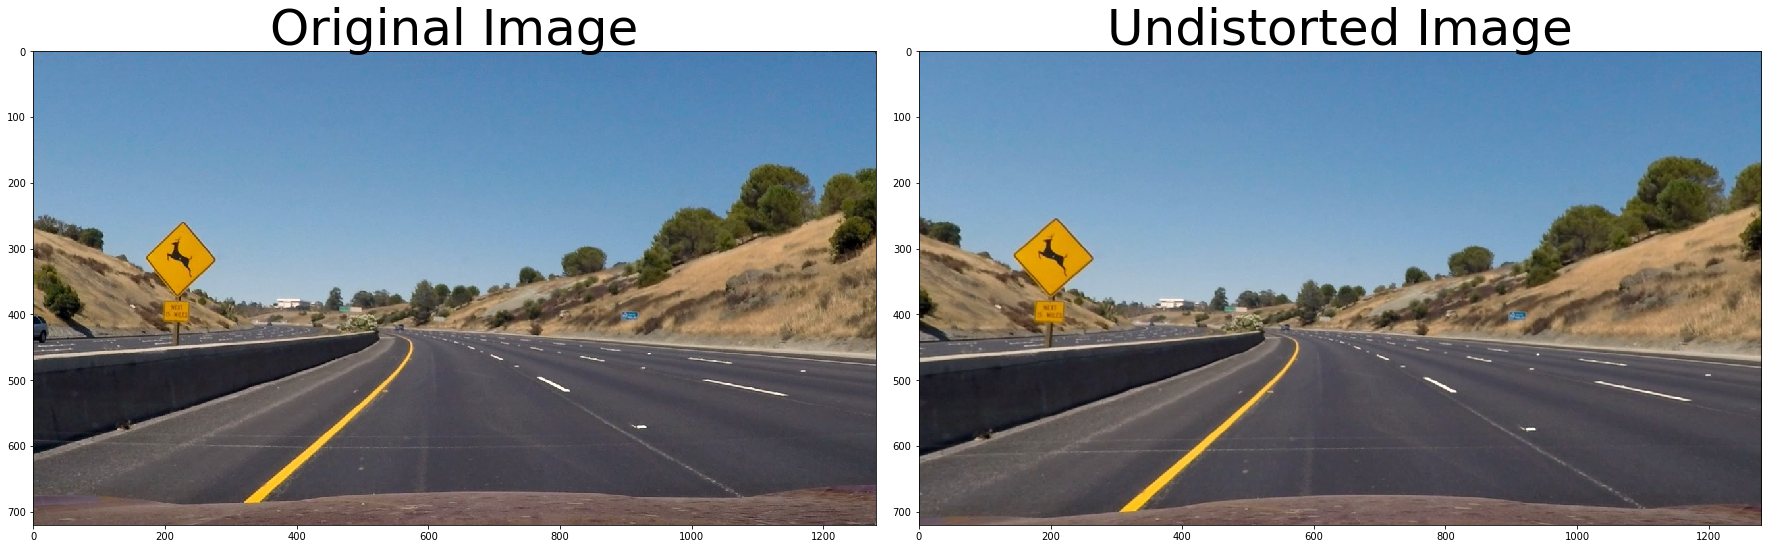

In [7]:
fname = './test_images/test2.jpg'

img = mpimg.imread(fname)

# Use the undistort function, with the mtx and dist calculated above
undist = undistort(img, mtx, dist)

### print an example plot of a comparison of a distorted and undistorted image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)